<a href="https://colab.research.google.com/github/marcgym2/big-data/blob/main/Practica2_Api_GMAPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Api de Google Maps
Este código configura y muestra dos mapas de Google Maps con diferentes niveles de zoom y agrega una capa de mapa de calor basada en datos de terremotos.

In [26]:
from PIL import Image
import matplotlib.pyplot as plt


image_path = "/content/fig1.png"
image_path2= "/content/fig2.png"
image_path3= "/content/fig3.png"
image = Image.open(image_path)
image2 = Image.open(image_path2)
image3 = Image.open(image_path3)

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

In [11]:
with open('/content/apikey.txt') as f:
    api_key1 = f.readline()
    f.close

In [12]:
#!pip install gmaps
import gmaps
gmaps.configure(api_key=api_key1)

In [13]:
mty_coordinates = (25.67693, -100.31370)
gmaps.figure(center= mty_coordinates, zoom_level=12)

Figure(layout=FigureLayout(height='420px'))

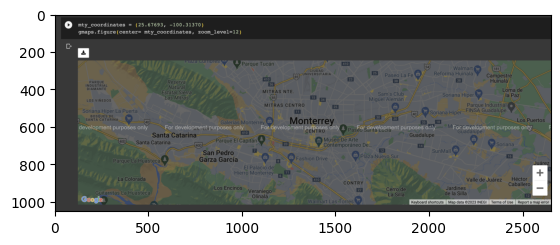

In [30]:
# Mostrar la imagen utilizando matplotlib
plt.imshow(image)

In [14]:
cdmx_coordinates = (19.42847, -99.12766)
gmaps.figure(center= cdmx_coordinates, zoom_level=10)

Figure(layout=FigureLayout(height='420px'))

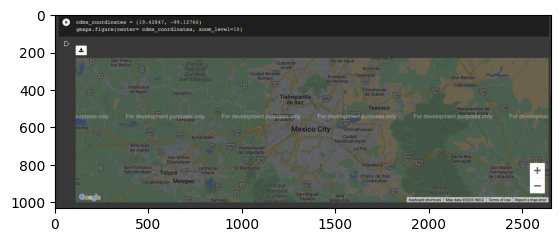

In [31]:
plt.imshow(image2)

In [34]:
import gmaps.datasets

In [35]:
earthquake_df = gmaps.datasets.load_dataset_as_df('earthquakes')
locations = earthquake_df[['latitude', 'longitude']]
weights = earthquake_df['magnitude']

fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

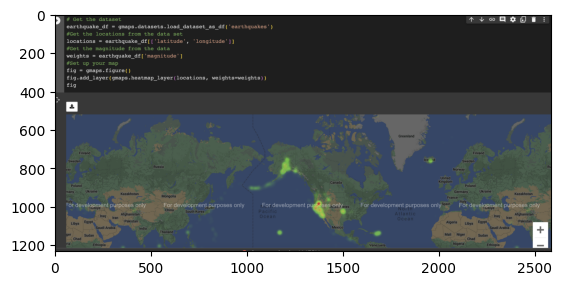

In [32]:
plt.imshow(image3)

Este código utiliza la biblioteca googlemaps para obtener direcciones y detalles de ruta entre dos ubicaciones geográficas utilizando la API de Google Maps. Al querer utilizarla la API de Google Maps requiere que se habilite la facturación en tu cuenta de Google Cloud para poder utilizarla.

In [36]:
#!pip install googlemaps

import googlemaps
from datetime import datetime
gmaps = googlemaps.Client(key=api_key1)

now = datetime.now()
directions_result = gmaps.directions("18.997739, 72.841280",
                                     "18.880253, 72.945137",
                                     mode="driving",
                                     avoid="ferries",
                                     departure_time=now
                                    )

print(directions_result[0]['legs'][0]['distance']['text'])
print(directions_result[0]['legs'][0]['duration']['text'])

ApiError: ignored